### Convolutional Neural Networks (CNNs) - Summary
CNNs are a type of deep learning model designed for processing spatial data, mainly images. They use convolutional layers to detect patterns like edges, textures, and shapes in images. Unlike traditional dense networks, CNNs reduce the number of parameters by sharing weights across spatially related pixels, making them highly efficient for tasks like image classification, object detection, and segmentation.

<b> CNN Properties </b> <br/>
<ol> <li> Feature Extraction - 
CNNs automatically detect patterns in images at different levels. <br/>
Example: Early layers detect edges (straight lines, curves)., Mid layers detect textures (fur, waves), Deep layers detect objects (eyes, faces, cars). No need to manually define features—CNNs learn them automatically!
</li>
    <li>Spatial Hierarchy (Pooling Layers) - Pooling reduces image size while keeping key features. <br/> Example: A 2x2 Max Pooling picks the brightest pixel in a 2x2 region. A 32x32 image becomes 16x16, keeping the strongest features. This speeds up training and prevents overfitting.</li>
    <li>Parameter Efficiency (Kernels/Filters) - Instead of assigning a weight to every pixel, CNNs use small filters (kernels) to detect patterns across the image. <br/> Example: A 3x3 filter scans the image and shares weights, unlike dense layers where each pixel has separate weights. Fewer parameters → Faster training & better generalization.</li>
    <li> Translation Invariance - CNNs recognize objects even if they shift position. <br/> Example: A CNN trained to detect a cat in the center can still recognize it if it appears in the corner. This makes CNNs robust to changes in object location.</li>
</ol>

<b>How CNN Enhances Certain Features?</b> <br/>
CNNs enhance certain features through a combination of convolutional layers, activation functions, and pooling operations. When an image passes through the convolutional layers, small filters (kernels) scan the image and detect essential patterns like edges, textures, and shapes. Early layers capture simple features like edges, while deeper layers identify complex structures such as facial features or objects. The activation function, typically ReLU, helps by keeping only the important positive values, suppressing weaker signals, and introducing non-linearity to make the model more powerful. Pooling layers, such as max pooling, further enhance feature selection by downsampling the image, preserving the most critical information while reducing unnecessary noise and computational load. By stacking multiple convolutional and pooling layers, CNNs gradually refine and emphasize the most relevant features in an image. <br/>
<b>Why Use Dense Layers with CNN?</b><br/>
Dense layers are integrated with CNNs to process and classify the extracted features. After the final convolutional and pooling layers, the multi-dimensional feature maps are flattened into a one-dimensional vector so that they can be passed into fully connected (dense) layers. These layers combine and interpret the extracted features, allowing the model to learn relationships between them. The final dense layer usually contains neurons equal to the number of output classes, using an activation function like softmax for multi-class classification. Essentially, while CNN layers focus on feature extraction, dense layers help in decision-making and classification based on the extracted patterns. Together, CNNs and dense layers create a powerful model capable of recognizing and categorizing images efficiently. So the information flowing to the dense layers are more focused and more accurate.

### Code

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Loading Fashion MNIST dataset

fashion_mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (testing_images, testing_labels) = fashion_mnist.load_data()

In [3]:
# Normalizing the images

training_images=training_images/255.0
testing_images = testing_images/255.0

Now we will build the model but this time we will use the CNN in the architecture -

In [4]:
class callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if logs['accuracy'] >= 0.98:
            print('Reached 98%. Stopping the training')
            self.model.stop_training = True

<b> Let's understand Pooling a bit </b><br/>
Pooling is used after convolutional layers to reduce the spatial dimensions of feature maps while retaining the most important information. It helps in downsampling, reducing computations, and preventing overfitting. The most common type is Max Pooling, which selects the highest value from a small region (e.g., 2×2 window), preserving strong features. Average Pooling takes the average of values, smoothing the feature map. Pooling enhances feature extraction by making CNNs more robust to small shifts or distortions in the image. By reducing unnecessary details, pooling layers allow deeper layers to focus on high-level patterns for better classification performance.

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),  # Input will come first
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),  # First convolution layer. Explained below
    tf.keras.layers.MaxPool2D(2,2),    # First maxpooling layer. Explained below
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), # Second covolution layer
    tf.keras.layers.MaxPool2D(2,2),  # Second maxpooling layer
    tf.keras.layers.Flatten(),  # Flatten layer
    tf.keras.layers.Dense(128, activation='relu'),  # First dense layer
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

This CNN model is designed for image classification - <br/>

-   Input Layer: Accepts grayscale images of size (28,28,1).
-   First Conv Layer: Applies 64 filters of size (3x3) with ReLU activation to detect patterns.
-  MaxPooling (2x2): Reduces feature map size, keeping important details.
- Second Conv + MaxPooling: Further extracts deeper features.
-  Flatten: Converts 2D feature maps into a 1D vector for the dense layers.
-  Dense (128 neurons, ReLU): Fully connected layer for feature learning.
-  Output (10 neurons, Softmax): Predicts class probabilities for 10 categories (digits 0-9). 

In [6]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs = 30, callbacks=[callback()])

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7852 - loss: 0.5989
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8865 - loss: 0.3069
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9052 - loss: 0.2546
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9191 - loss: 0.2157
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9297 - loss: 0.1880
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9392 - loss: 0.1617
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9465 - loss: 0.1442
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9522 - loss: 0.1276
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9590 - loss: 0.1088
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9640 - loss: 0.0960
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9671 - loss: 0.0856
Epoch 12/30
1875/1875 ━━━━━━━━

In [8]:
# Now we will evaluate the model

test_loss, test_accuracy = model.evaluate(testing_images, testing_labels, verbose=0)
print('Loss is ',test_loss)
print('Accuracy is ',test_accuracy)

Loss is  0.41473188996315
Accuracy is  0.9126999974250793


The model performed much better than with only dense layers but we can sense overfitting here. Overfitting occurs when a model learns patterns too specific to the training data, reducing its ability to generalize to unseen data. Running for too many epochs can cause the model to memorize training examples instead of learning meaningful patterns. Model achieving 98% training accuracy but only 91.26% testing accuracy suggests mild overfitting, though the similar loss values indicate it is not severe. This means the model is still performing well but may struggle slightly with unseen data. To reduce overfitting, techniques like early stopping, dropout, data augmentation, or L2 regularization can be used to improve generalization.

In [41]:
import numpy as np
np.argmax(model.predict(testing_images[104:105]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


7

In [16]:
testing_labels[104]

7

### Visualizing convolution and maxpooling layers

Let's pick for label 7 to visualize. We will select three images of label 7 -

In [61]:
[i for i in range(50) if testing_labels[i] == 7]

[9, 12, 22, 36, 38, 43, 45]

In [62]:
FIRST_IMAGE = 9
SECOND_IMAGE = 22
THIRD_IMAGE = 45

CONVOLUTION_NUMBER = 2

LAYERS_TO_VIZUALIZE = [tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D]

These three lines define the indices of the images you want to visualize from your testing_images dataset. FIRST_IMAGE, SECOND_IMAGE, and THIRD_IMAGE correspond to the image at indices 9, 22, and 45, respectively.
<br/>
CONVOLUTION_NUMBER - This sets the index of the convolutional layer you want to visualize. It assumes there are multiple filters (convolutions) in the layer (in our case its 64 in the first layer and 64 in the second layer), and you want to visualize the 2nd convolution filter in each layer.
<br/>
LAYERS_TO_VIZUALIZE - Defines the layers you want to visualize, specifically Conv2D and MaxPooling2D. These are the layers from which you'll extract activations.

In [63]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>]

In [64]:
layer_outputs = [layer.output for layer in model.layers if type(layer) in LAYERS_TO_VIZUALIZE]
layer_outputs

[<KerasTensor shape=(None, 26, 26, 64), dtype=float32, sparse=False, name=keras_tensor_1>,
 <KerasTensor shape=(None, 13, 13, 64), dtype=float32, sparse=False, name=keras_tensor_2>,
 <KerasTensor shape=(None, 11, 11, 64), dtype=float32, sparse=False, name=keras_tensor_3>,
 <KerasTensor shape=(None, 5, 5, 64), dtype=float32, sparse=False, name=keras_tensor_4>]

This line generates a list of output tensors from the layers of type Conv2D or MaxPooling2D in the model. It iterates through all layers in model, checks their type, and appends the output tensor to layer_outputs.

In [65]:
model.inputs

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=None, name=keras_tensor>]

In [66]:
activation_model = tf.keras.models.Model(inputs=model.inputs, outputs=layer_outputs)
activation_model

<Functional name=functional_4, built=True>

This creates a new activation model using the Functional API. It defines a new model that takes the same inputs as the original model but outputs the activation values from the layers defined in layer_outputs.

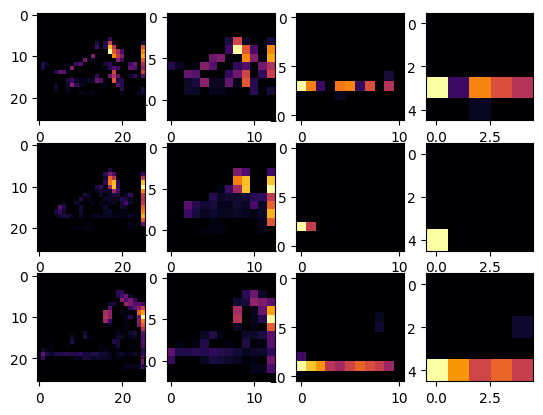

In [67]:
f, axis = plt.subplots(3, len(layer_outputs))  #3 rows (for the three images) and len(layer_outputs) columns (one for each layer to visualize)


#A loop that iterates over each layer output in layer_outputs. x is the index for the layer you're processing in each iteration.
for x in range(len(layer_outputs)):
    f1 = activation_model.predict(testing_images[FIRST_IMAGE].reshape(1,28,28,1), verbose=False)[x]
    axis[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap = 'inferno')
    axis[0,x].grid(False)

    f2 = activation_model.predict(testing_images[SECOND_IMAGE].reshape(1,28,28,1), verbose=False)[x]
    axis[1, x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap = 'inferno')
    axis[1,x].grid(False)

    f3 = activation_model.predict(testing_images[THIRD_IMAGE].reshape(1,28,28,1), verbose=False)[x]
    axis[2, x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap = 'inferno')
    axis[2,x].grid(False)

Code explanation picking the first image example as all the three are same - <br/>
- testing_images[FIRST_IMAGE].reshape(1,28,28,1): Reshapes the image at index 9 into a batch of 1 image with shape (1, 28, 28, 1) (required input shape for Conv2D).
- activation_model.predict(...)[x]: Runs the image through the activation_model and extracts the activations for the x-th layer.
- f1[0, :, :, CONVOLUTION_NUMBER]: Selects the 2nd convolutional filter (indexed by CONVOLUTION_NUMBER = 2).
- imshow(): Visualizes the feature map of that convolutional filter using the 'inferno' colormap.
- grid(False): Disables the grid lines on the plot for clarity.

Let's select a different convolution number of 30 -

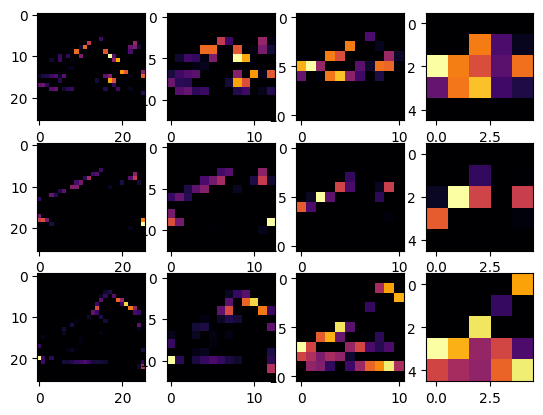

In [69]:
CONVOLUTION_NUMBER = 30

f, axis = plt.subplots(3, len(layer_outputs))  #3 rows (for the three images) and len(layer_outputs) columns (one for each layer to visualize)


#A loop that iterates over each layer output in layer_outputs. x is the index for the layer you're processing in each iteration.
for x in range(len(layer_outputs)):
    f1 = activation_model.predict(testing_images[FIRST_IMAGE].reshape(1,28,28,1), verbose=False)[x]
    axis[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap = 'inferno')
    axis[0,x].grid(False)

    f2 = activation_model.predict(testing_images[SECOND_IMAGE].reshape(1,28,28,1), verbose=False)[x]
    axis[1, x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap = 'inferno')
    axis[1,x].grid(False)

    f3 = activation_model.predict(testing_images[THIRD_IMAGE].reshape(1,28,28,1), verbose=False)[x]
    axis[2, x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap = 'inferno')
    axis[2,x].grid(False)